## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [106]:
import numpy as np
import pandas as pd

reviews = pd.read_csv('reviews.txt', header=None)
labels = pd.read_csv('labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(type(reviews))
print(reviews.head())

<class 'pandas.core.frame.DataFrame'>
                                                   0
0  bromwell high is a cartoon comedy . it ran at ...
1  story of a man who has unnatural feelings for ...
2  homelessness  or houselessness as george carli...
3  airport    starts as a brand new luxury    pla...
4  brilliant over  acting by lesley ann warren . ...


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_temp, X_test, y_temp, y_test = train_test_split(
    reviews, labels, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

vectorizer = CountVectorizer(max_features=10000)

X_train_bow = vectorizer.fit_transform(X_train[0])
X_val_bow = vectorizer.transform(X_val[0])
X_test_bow = vectorizer.transform(X_test[0])

print(f"\nVocabulary size: {len(vectorizer.vocabulary_)}")

Train set size: 16000
Validation set size: 4000
Test set size: 5000

Vocabulary size: 10000


**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [108]:
# 1. How is a single word represented?
print("Single Word Representation")
word_example = "good"
if word_example in vectorizer.vocabulary_:
    word_index = vectorizer.vocabulary_[word_example]
    print(f"The word '{word_example}' is represented by index: {word_index}")
    print(f"This means it corresponds to column {word_index} in the BoW matrix")
else:
    print(f"'{word_example}' not in vocabulary")

# Show a few more examples
print("\nMore word examples:")
for word in ["movie", "bad", "excellent", "terrible"]:
    if word in vectorizer.vocabulary_:
        print(f"'{word}' -> index {vectorizer.vocabulary_[word]}")

# 2. How is a whole review represented?
print("\n Whole Review Representation")
review_index = 0
print(f"Original review text (first 200 chars):\n{X_train[review_index][:200]}...\n")

# Get the BoW representation
review_bow = X_train_bow[review_index]
print(f"BoW representation shape: {review_bow.shape}")
print(f"Type: {type(review_bow)}")
print(f"Number of non-zero elements: {review_bow.nnz}")

review_dense = review_bow.toarray().flatten()
non_zero_indices = np.where(review_dense > 0)[0]
print(f"\nNon-zero word counts in this review:")
print(f"Total unique words from vocabulary: {len(non_zero_indices)}")

Single Word Representation
The word 'good' is represented by index: 3845
This means it corresponds to column 3845 in the BoW matrix

More word examples:
'movie' -> index 5850
'bad' -> index 668
'excellent' -> index 3097
'terrible' -> index 8925

 Whole Review Representation
Original review text (first 200 chars):
6911     the     michael keaton kiddie comedy of the sa...
17960    beautiful film  pure cassavetes style . gena r...
13714    i wonder what audiences of the day thought whe...
15813    leonard maltin compared this film to a mel bro...
22169    let me start out by saying i can enjoy just ab...
                               ...                        
4074     i love horses and admire hand drawn animation ...
21832    hollow point  though clumsy in places  manages...
16953    the good earth is not a great film by any mean...
4232     william castle is notorious among horror fans ...
15374    cunningly interesting western from a director ...
Name: 0, Length: 200, dtype: object.

In [109]:
print("\nExample word counts:")
idx_to_word = {i: w for w, i in vectorizer.vocabulary_.items()} #reverse mapping
    
for idx in non_zero_indices[:10]: 
    word = idx_to_word[idx] # get word from index
    count = review_dense[idx] 
    print(f"  '{word}' appears {int(count)} times")


Example word counts:
  'and' appears 2 times
  'arms' appears 1 times
  'as' appears 1 times
  'be' appears 1 times
  'boggling' appears 1 times
  'but' appears 2 times
  'cast' appears 1 times
  'comedy' appears 2 times
  'compared' appears 1 times
  'condemned' appears 1 times


**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

X_train shape: (16000, 10000)
Trying units=32, dropout=0.0, lr=0.001


c:\Users\mtymi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


  val_acc=0.8857
Trying units=32, dropout=0.0, lr=0.0001
  val_acc=0.8960
Trying units=32, dropout=0.2, lr=0.001
  val_acc=0.8867
Trying units=32, dropout=0.2, lr=0.0001
  val_acc=0.8903
Trying units=64, dropout=0.0, lr=0.001
  val_acc=0.8835
Trying units=64, dropout=0.0, lr=0.0001
  val_acc=0.8957
Trying units=64, dropout=0.2, lr=0.001
  val_acc=0.8870
Trying units=64, dropout=0.2, lr=0.0001
  val_acc=0.8955
Trying units=128, dropout=0.0, lr=0.001
  val_acc=0.8852
Trying units=128, dropout=0.0, lr=0.0001
  val_acc=0.8965
Trying units=128, dropout=0.2, lr=0.001
  val_acc=0.8903
Trying units=128, dropout=0.2, lr=0.0001
  val_acc=0.8947

Best config (from quick sweep): {'units': 128, 'dropout': 0.0, 'lr': 0.0001} val_acc: 0.8964999914169312

Training final model on train+val...
Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.7879 - loss: 0.5109 - val_accuracy: 0.8765 - val_loss: 0.3863 - learning_rate: 1.0000e-04
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - 

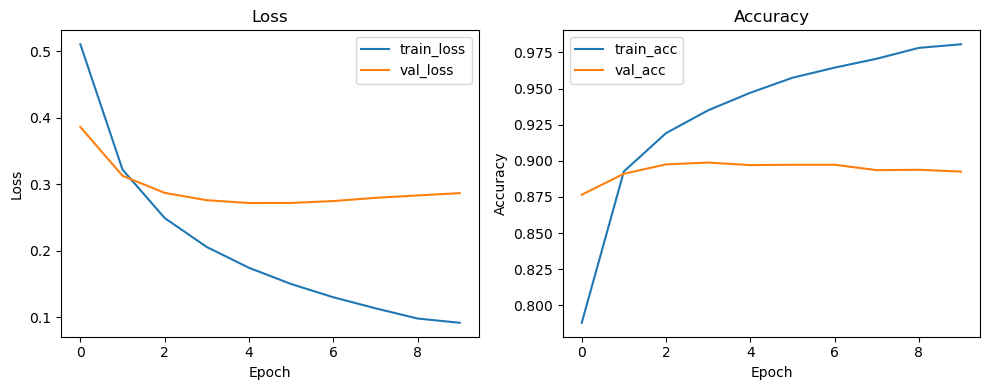

In [110]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

X_train_dense = X_train_bow.toarray()
X_val_dense = X_val_bow.toarray()
X_test_dense = X_test_bow.toarray()

print(f"X_train shape: {X_train_dense.shape}")

# Prepare dense matrices (already created earlier) and labels
# X_train_dense, X_val_dense, X_test_dense are expected to exist from previous cells
y_train_bin = (y_train[0] == 'positive').astype(int).values
y_val_bin = (y_val[0]   == 'positive').astype(int).values
y_test_bin = (y_test[0]  == 'positive').astype(int).values

input_dim = X_train_dense.shape[1]

def build_model(units=64, dropout=0.2, lr=1e-3):
    model = keras.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Quick hyperparameter sweep (short runs to pick promising config)
param_grid = {
    "units": [32, 64, 128],
    "dropout": [0.0, 0.2],
    "lr": [1e-3, 1e-4]
}

best_cfg = None
best_val_acc = 0.0

for units in param_grid["units"]:
    for dropout in param_grid["dropout"]:
        for lr in param_grid["lr"]:
            print(f"Trying units={units}, dropout={dropout}, lr={lr}")
            model = build_model(units=units, dropout=dropout, lr=lr)
            hist = model.fit(
                X_train_dense, y_train_bin,
                validation_data=(X_val_dense, y_val_bin),
                epochs=5, batch_size=64, verbose=0
            )
            val_acc = hist.history['val_accuracy'][-1]
            print(f"  val_acc={val_acc:.4f}")
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_cfg = {"units": units, "dropout": dropout, "lr": lr}

print("\nBest config (from quick sweep):", best_cfg, "val_acc:", best_val_acc)

# Final training

final_units = best_cfg["units"]
final_dropout = best_cfg["dropout"]
final_lr = best_cfg["lr"]

final_model = build_model(units=final_units, dropout=final_dropout, lr=final_lr)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

print("\nTraining final model on train+val...")
history = final_model.fit(
    X_train_dense, y_train_bin,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_dense, y_val_bin),
    callbacks=callbacks,
    verbose=1
)

# Plot learning curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history.get('accuracy', history.history.get('acc', [])), label='train_acc')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

**(d)** Test your sentiment-classifier on the test set.

In [111]:
test_loss, test_acc = final_model.evaluate(X_test_dense, y_test_bin, verbose=0)
print(f"\nTest set -> loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")


Test set -> loss: 0.2891, accuracy: 0.8914


**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [112]:
custom_sentences = [
    "I loved this movie. It was exciting and very well acted.",
    "This was a terrible movie. I wasted my time.",
    "The plot was okay but the acting saved it.",
    "Boring, predictable and too long.",
    "I was having high hopes, but it just didn't deliver.",
    "Watching this film was one of the biggest mistakes of my life.",
    "I could find better ways to spend my time than watching this.",
    "Very good way to waste time.",
    "This sentence has nothing to do with movies. Just wanted to see what happens.",
    "Great, amazing, spectacular, decent.",
    "I would definitely recommend this to my friends!",
    "Masterpiece of cinematography and storytelling."
]

# Vectorize and predict
X_custom_bow = vectorizer.transform(custom_sentences)
preds = final_model.predict(X_custom_bow.toarray()).flatten()
for sent, p in zip(custom_sentences, preds):
    label = 'positive' if p >= 0.5 else 'negative'
    print(f"\nSentence: {sent}\n  prob_positive={p:.3f} -> {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step

Sentence: I loved this movie. It was exciting and very well acted.
  prob_positive=0.724 -> positive

Sentence: This was a terrible movie. I wasted my time.
  prob_positive=0.288 -> negative

Sentence: The plot was okay but the acting saved it.
  prob_positive=0.340 -> negative

Sentence: Boring, predictable and too long.
  prob_positive=0.306 -> negative

Sentence: I was having high hopes, but it just didn't deliver.
  prob_positive=0.452 -> negative

Sentence: Watching this film was one of the biggest mistakes of my life.
  prob_positive=0.431 -> negative

Sentence: I could find better ways to spend my time than watching this.
  prob_positive=0.468 -> negative

Sentence: Very good way to waste time.
  prob_positive=0.380 -> negative

Sentence: This sentence has nothing to do with movies. Just wanted to see what happens.
  prob_positive=0.345 -> negative

Sentence: Great, amazing, spectacular, decent.
  prob_positive=0.654 -> positive

Sentence: